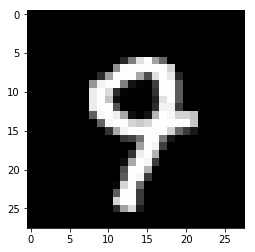

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#import data from file
train_data = pd.read_csv("train.csv")

labels = train_data.iloc[:,[0]].values
images = train_data.iloc[:,1:].values

images = images/255.0 #to normalise each image to [0,1]


# reshape images(28,28,1)
images = images.reshape(images.shape[0], 28, 28, 1).astype('float32')

from keras.utils import to_categorical
labels = to_categorical(labels,num_classes = 10) #to convert labels as 3= [0,0,0, 1, 0, 0, 0,0 ,... ]

train_im, test_im, train_labels,test_labels = train_test_split(images, labels, test_size = 0.1, random_state=2)
#train_im = train_im.reshape(train_im.shape[0], 28, 28, 1).astype('float32')
#test_im = test_im.reshape(test_im.shape[0], 28, 28, 1).astype('float32')
plt.imshow(test_im[1][:,:,0],cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D  #to add convolutional layer
from keras.layers.convolutional import MaxPooling2D #to add pooling layer

In [9]:
def convolutional_model(num_classes):
    model = Sequential()
    input_shape = (28,28,1)
    
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(200,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    
    #compile and optimize the model 
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [12]:
num_classes = 10 

model = convolutional_model(num_classes)
model.summary()
#fitting data images and labels to CNN model
model.fit(train_im,train_labels,batch_size=200,epochs=10,verbose=2)

#evaluating model
scores = model.evaluate(test_im, test_labels, verbose=0)

print('Accuracy :',scores)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

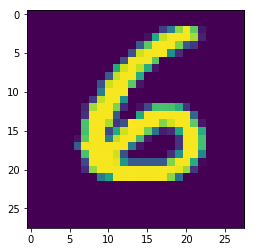

In [72]:
plt.imshow(test_im[0][:,:,0])

In [73]:
test_data=pd.read_csv('test.csv')
#to normalise test data
test_data=test_data/255.5

test_data = test_data.values.reshape(-1, 28, 28, 1)

In [74]:
results=model.predict(test_data)
results = np.argmax(results,axis = 1)
print(results)

[2 0 9 ... 3 9 2]


In [75]:
results=pd.Series(results,name="Label")
print(results.head())

0    2
1    0
2    9
3    9
4    3
Name: Label, dtype: int64


In [76]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [21]:
import cv2
def make_prediction(image):
    unknown=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    unknown=cv2.resize(unknown,(28,28))
    unknown=unknown/255.0
    plt.imshow(unknown)
    unknown=np.array(unknown).reshape(-1,28,28,1)
    predict=model.predict(unknown)
    return np.argmax(predict,axis = 1)


[8]


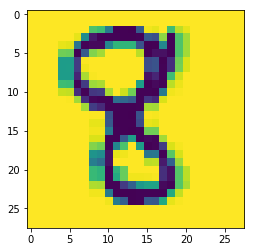

In [23]:
print(make_prediction('images.png'))